In [1]:
import pandas as pd

# File names (in the same directory as the notebook)
control_group_file = 'controlgroup.csv'
experiment_group_file = 'Experimentgroup.csv'

# Load CSV files into DataFrames
control_group_df = pd.read_csv(control_group_file)
experiment_group_df = pd.read_csv(experiment_group_file)

# Display the first few rows of each DataFrame
print("Control Group DataFrame:")
print(control_group_df.head())

print("\nExperiment Group DataFrame:")
print(experiment_group_df.head())

# Verify the shape of the DataFrames
print("\nControl Group DataFrame Shape:", control_group_df.shape)
print("Experiment Group DataFrame Shape:", experiment_group_df.shape)


Control Group DataFrame:
  ID  How well the space allows you to concentrate?  \
0  1                                            5.0   
1  2                                            5.0   
2  3                                            3.0   
3  4                                            3.0   
4  5                                            3.0   

   To what extent would you feel safe expressing an opinion in this space?  \
0                                                3.0                         
1                                                2.0                         
2                                                4.0                         
3                                                2.0                         
4                                                3.0                         

   How comfortable would you feel collaborating with others in this space?  \
0                                                2.0                         
1                  

Shapiro-Wilk Test Results for Control Group:
Column: How well the space allows you to concentrate?
  Statistic: 0.9117, P-value: 0.0037
  -> Data is not normally distributed (reject H0)


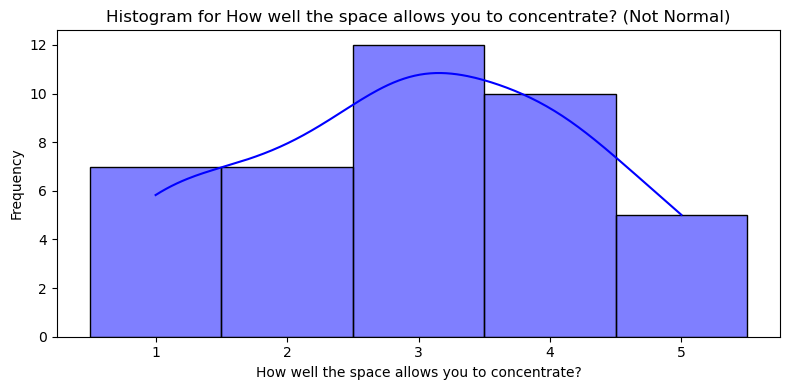

Column: To what extent would you feel safe expressing an opinion in this space?
  Statistic: 0.8896, P-value: 0.0008
  -> Data is not normally distributed (reject H0)


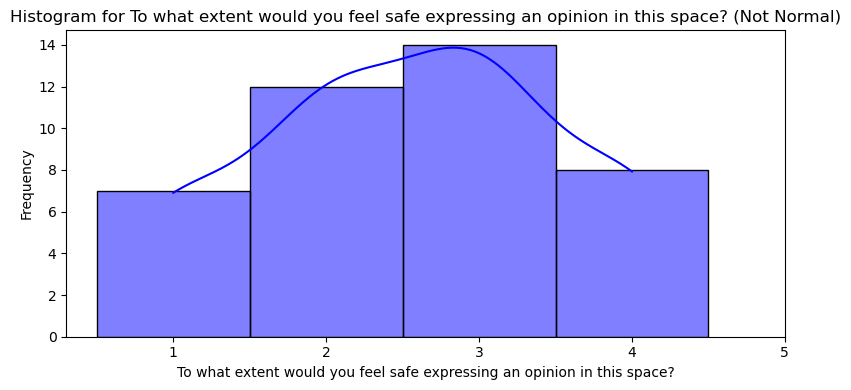

Column: How comfortable would you feel collaborating with others in this space?
  Statistic: 0.9198, P-value: 0.0067
  -> Data is not normally distributed (reject H0)


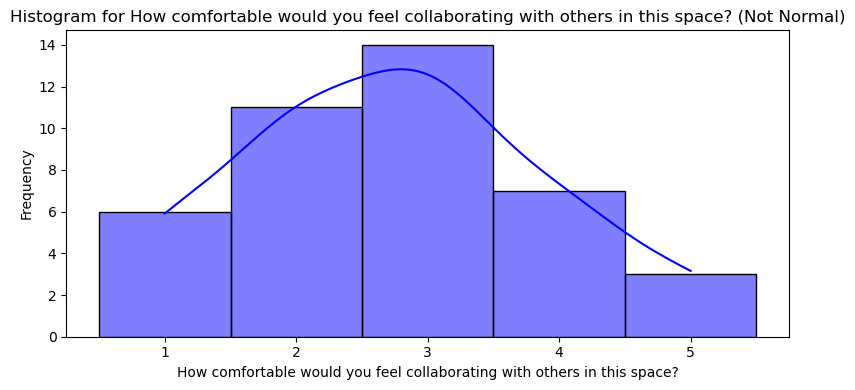

Column: To what extent does the space design provide a sense of privacy?
  Statistic: 0.8475, P-value: 0.0001
  -> Data is not normally distributed (reject H0)


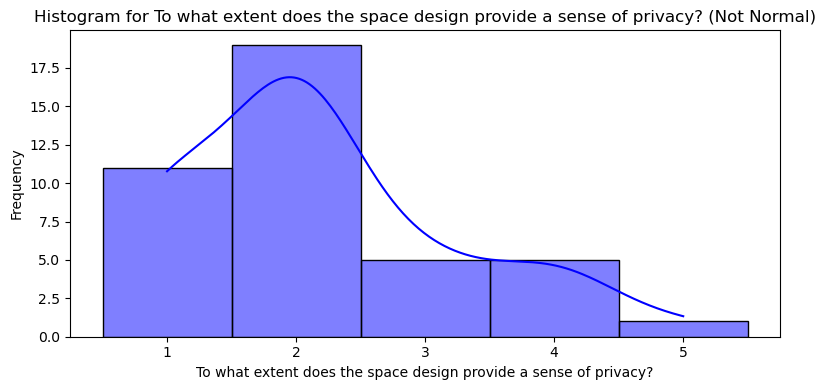

Column: Does the design of the space encourage creativity?
  Statistic: 0.9033, P-value: 0.0021
  -> Data is not normally distributed (reject H0)


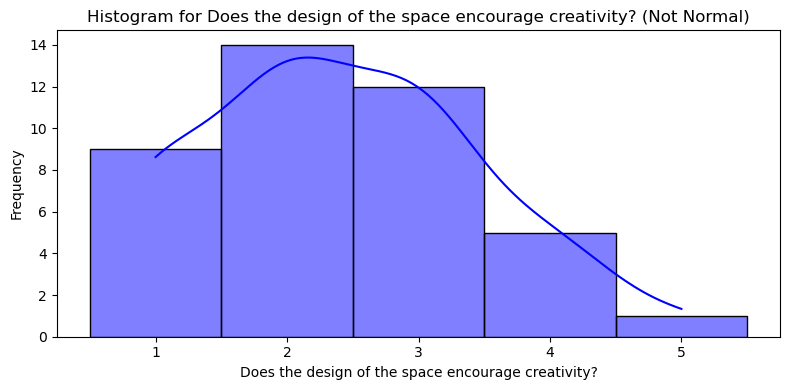

Column: How suitable is the space for team tasks?
  Statistic: 0.9166, P-value: 0.0053
  -> Data is not normally distributed (reject H0)


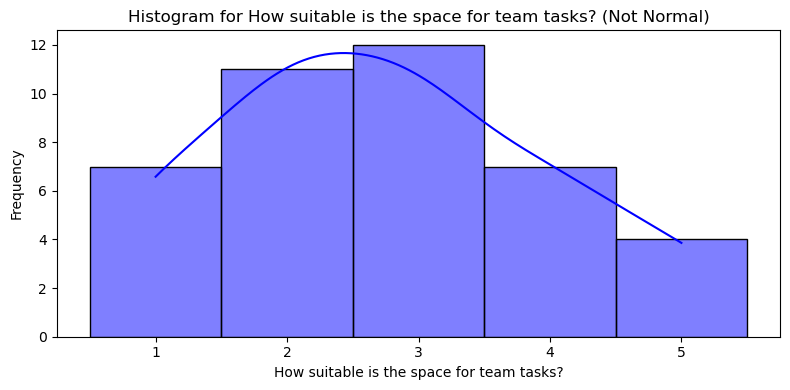

Column: To what extent does the design of the space encourage a sense of belonging to the group?
  Statistic: 0.8007, P-value: 0.0000
  -> Data is not normally distributed (reject H0)


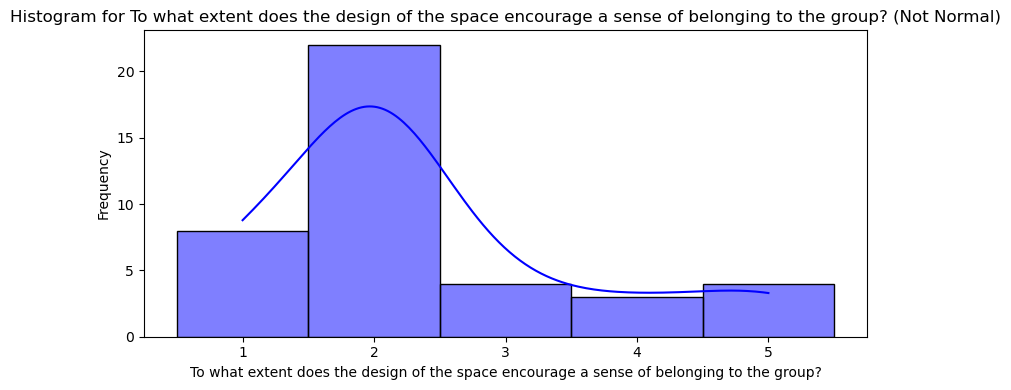

Shapiro-Wilk Test Results for Experiment Group:
Column: How well the space allows you to concentrate?
  Statistic: 0.8947, P-value: 0.0013
  -> Data is not normally distributed (reject H0)


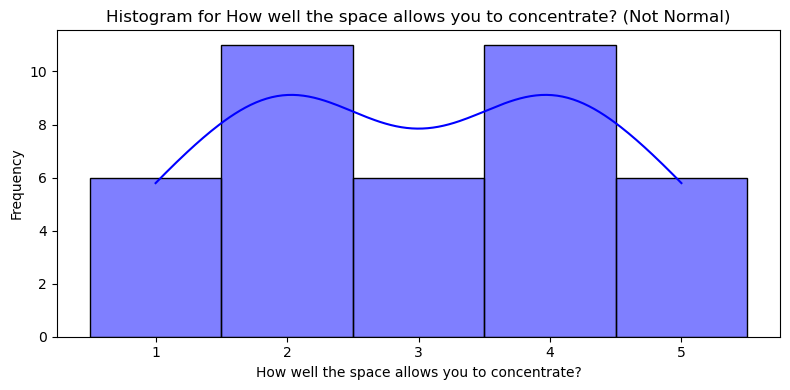

Column: To what extent would you feel safe expressing an opinion in this space?
  Statistic: 0.8349, P-value: 0.0000
  -> Data is not normally distributed (reject H0)


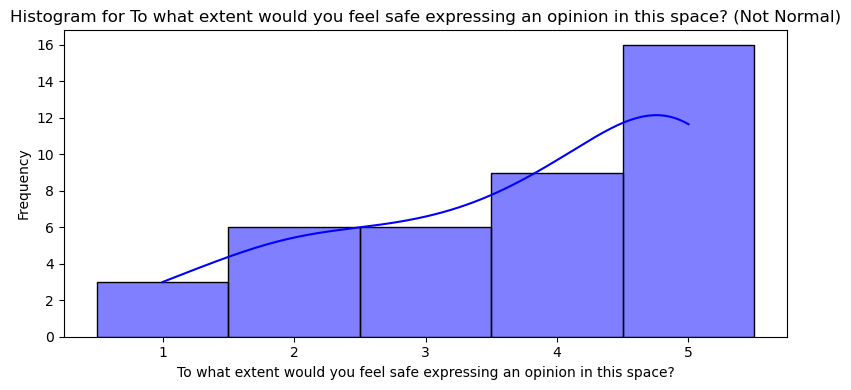

Column: How comfortable would you feel collaborating with others in this space?
  Statistic: 0.8160, P-value: 0.0000
  -> Data is not normally distributed (reject H0)


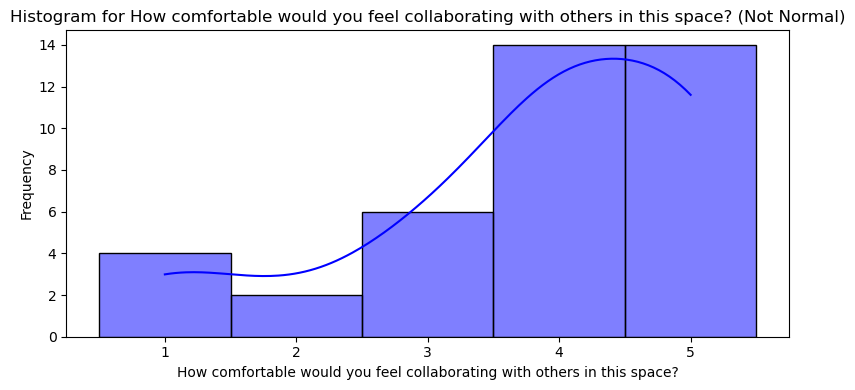

Column: To what extent does the space design provide a sense of privacy?
  Statistic: 0.9081, P-value: 0.0033
  -> Data is not normally distributed (reject H0)


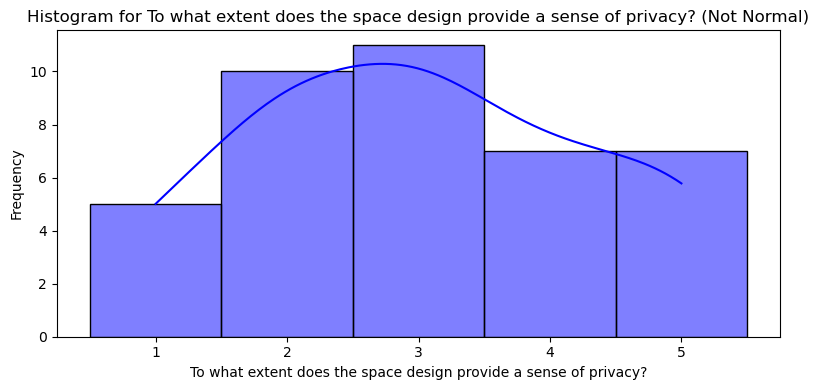

Column: Does the design of the space encourage creativity?
  Statistic: 0.8370, P-value: 0.0000
  -> Data is not normally distributed (reject H0)


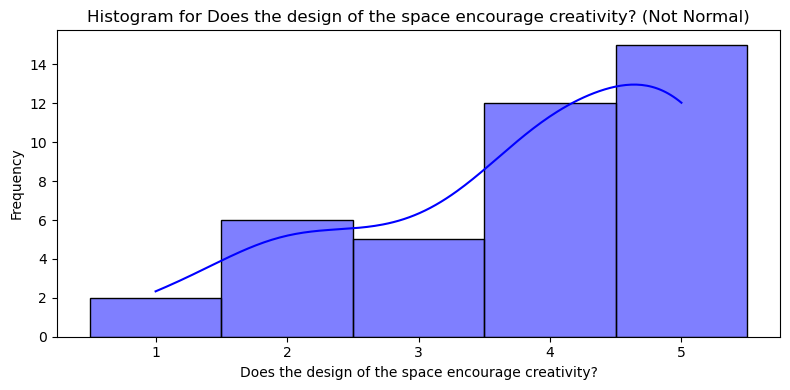

Column: How suitable is the space for team tasks?
  Statistic: 0.8237, P-value: 0.0000
  -> Data is not normally distributed (reject H0)


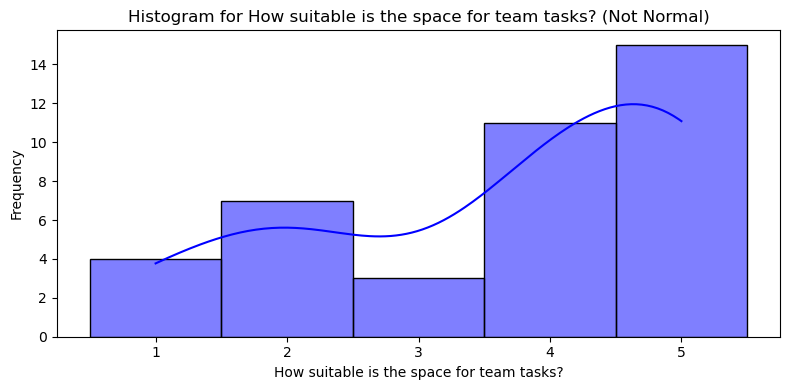

Column: To what extent does the design of the space encourage a sense of belonging to the group?
  Statistic: 0.8465, P-value: 0.0001
  -> Data is not normally distributed (reject H0)


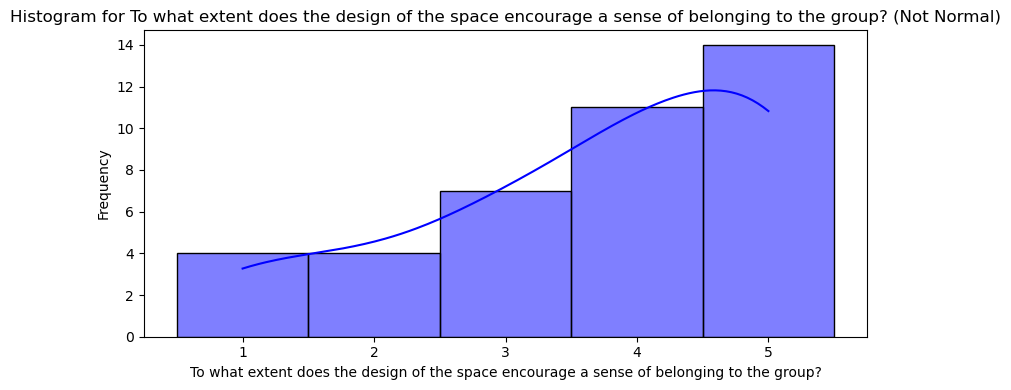

In [57]:
import pandas as pd
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

def shapiro_test_with_histograms(df, df_name):
    print(f"Shapiro-Wilk Test Results for {df_name}:")
    for column in df.columns:
        if column.strip() not in ['ID', 'Would you prefer to use this space for meetings?'] and pd.api.types.is_numeric_dtype(df[column]):
            data = df[column].dropna()  # Drop missing values
            if len(data.unique()) > 1:  # Ensure there are multiple unique values
                stat, p_value = shapiro(data)
                print(f"Column: {column}")
                print(f"  Statistic: {stat:.4f}, P-value: {p_value:.4f}")
                if p_value > 0.05:
                    print("  -> Data is likely normally distributed (fail to reject H0)")
                else:
                    print("  -> Data is not normally distributed (reject H0)")
                
                plt.figure(figsize=(8, 4))
                sns.histplot(data, kde=True, color='blue', bins=5, discrete=True)
                plt.xticks(range(1, 6))
                plt.title(f"Histogram for {column} ({'Normal' if p_value > 0.05 else 'Not Normal'})")
                plt.xlabel(column)
                plt.ylabel('Frequency')
                plt.tight_layout()
                plt.show()
            else:
                print(f"Column {column} has insufficient unique values for Shapiro-Wilk test.")


# Perform Shapiro-Wilk test with histograms on control group
shapiro_test_with_histograms(control_group_df, "Control Group")

# Perform Shapiro-Wilk test with histograms on experiment group
shapiro_test_with_histograms(experiment_group_df, "Experiment Group")


In [5]:
print(control_group_df)

        ID  How well the space allows you to concentrate?  \
0        1                                       5.000000   
1        2                                       5.000000   
2        3                                       3.000000   
3        4                                       3.000000   
4        5                                       3.000000   
5        6                                       5.000000   
6        7                                       4.000000   
7        8                                       1.000000   
8        9                                       3.000000   
9       10                                       2.000000   
10      11                                       2.000000   
11      12                                       3.000000   
12      13                                       5.000000   
13      14                                       3.000000   
14      15                                       2.000000   
15      16              

Kolmogorov-Smirnov Test Results for Control Group:
Column: How well the space allows you to concentrate?
  Statistic: 0.1561, P-value: 0.2439
  -> Fail to reject H₀: Data is likely normally distributed.
  -> P-value indicates no significant deviation from normality.



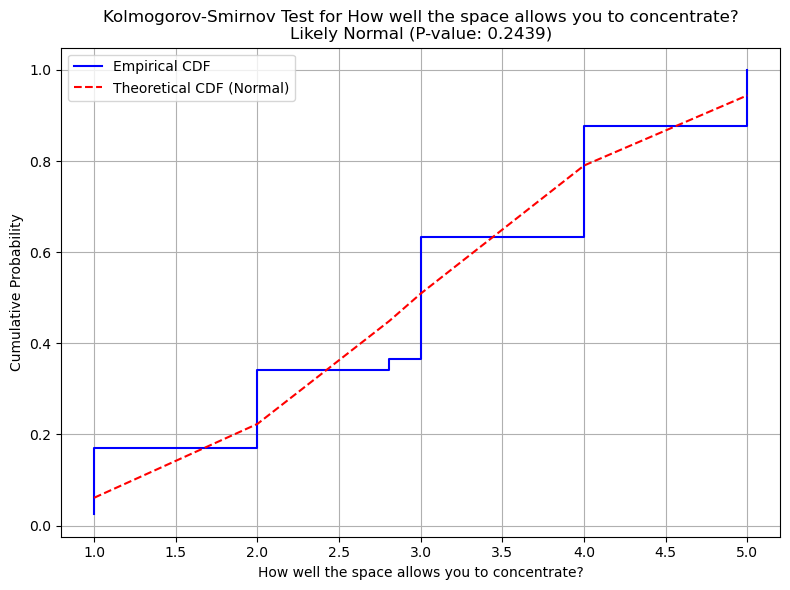

Column: To what extent would you feel safe expressing an opinion in this space?
  Statistic: 0.1830, P-value: 0.1128
  -> Fail to reject H₀: Data is likely normally distributed.
  -> P-value indicates no significant deviation from normality.



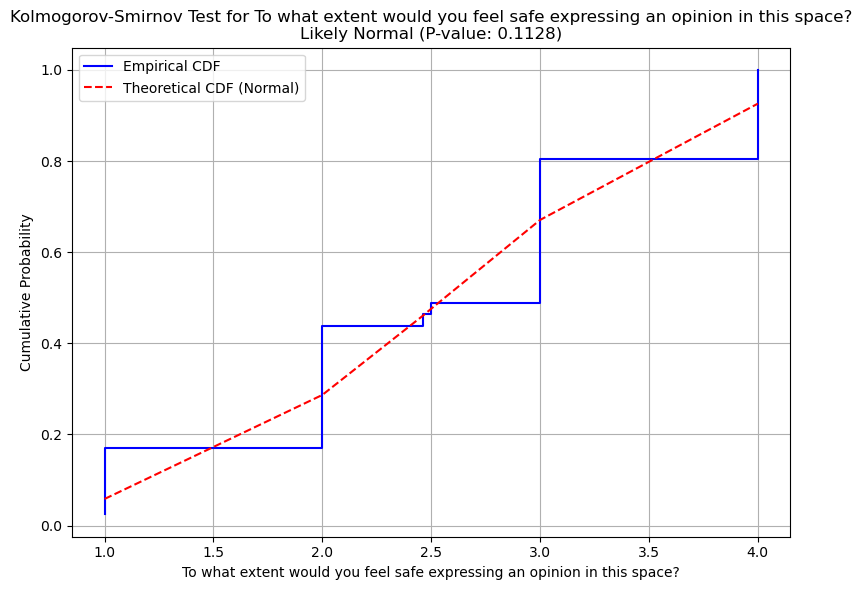

Column: How comfortable would you feel collaborating with others in this space?
  Statistic: 0.1678, P-value: 0.1772
  -> Fail to reject H₀: Data is likely normally distributed.
  -> P-value indicates no significant deviation from normality.



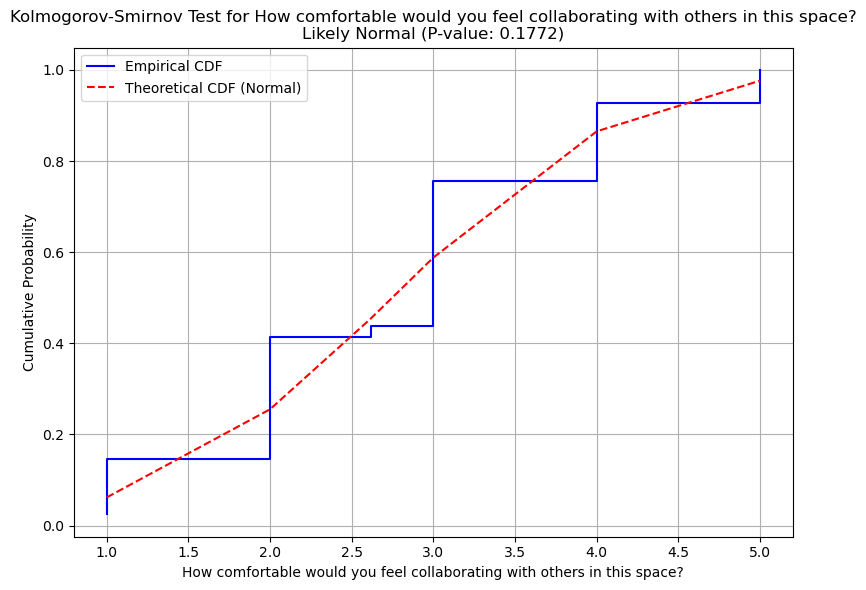

Column: To what extent does the space design provide a sense of privacy?
  Statistic: 0.2743, P-value: 0.0032
  -> Reject H₀: Data is not normally distributed.
  -> P-value indicates significant deviation from normality.



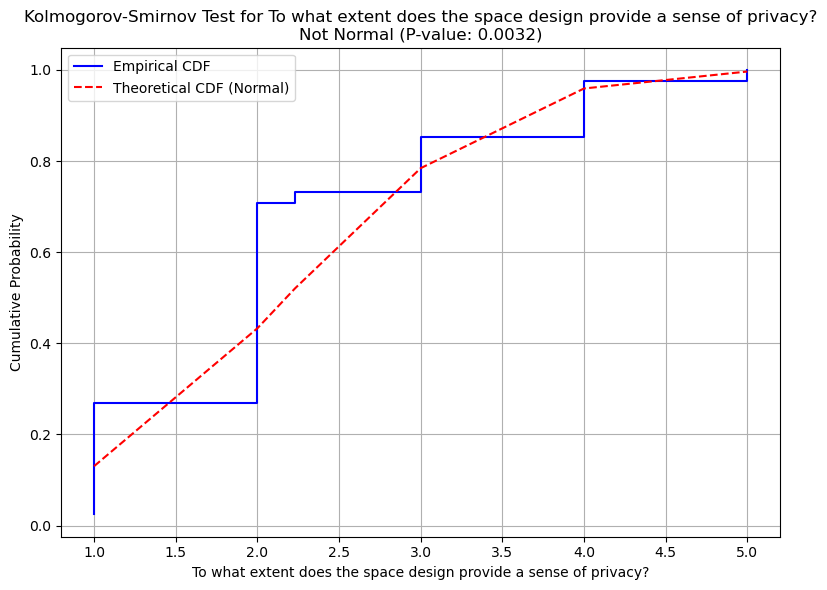

Column: Does the design of the space encourage creativity?
  Statistic: 0.1860, P-value: 0.1028
  -> Fail to reject H₀: Data is likely normally distributed.
  -> P-value indicates no significant deviation from normality.



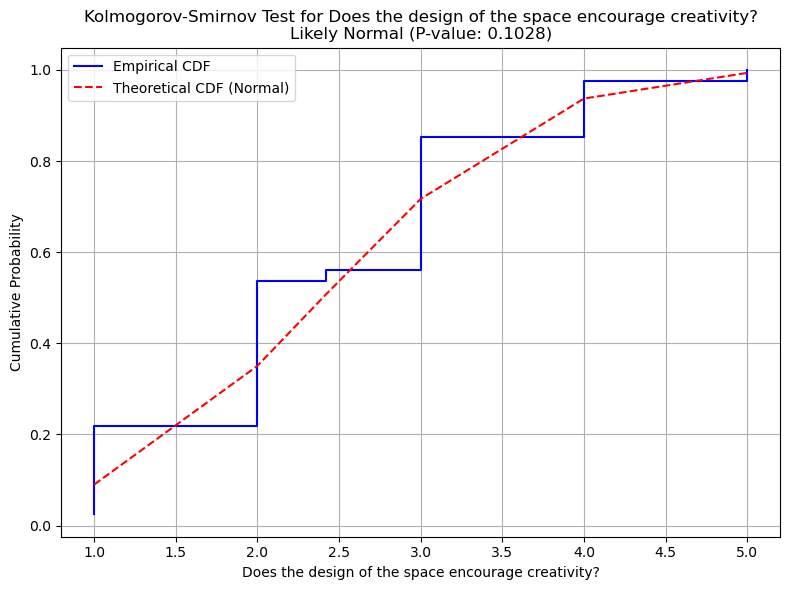

Column: How suitable is the space for team tasks?
  Statistic: 0.1658, P-value: 0.1875
  -> Fail to reject H₀: Data is likely normally distributed.
  -> P-value indicates no significant deviation from normality.



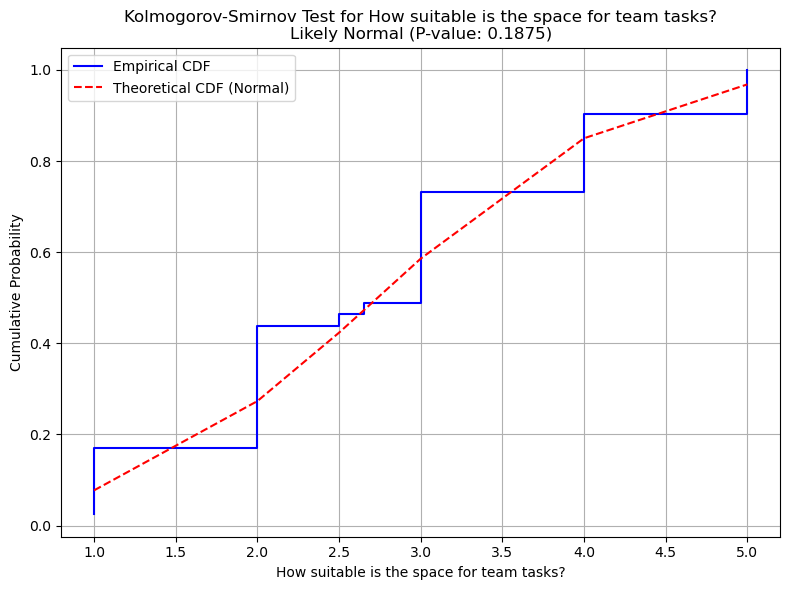

Column: To what extent does the design of the space encourage a sense of belonging to the group?
  Statistic: 0.3242, P-value: 0.0002
  -> Reject H₀: Data is not normally distributed.
  -> P-value indicates significant deviation from normality.



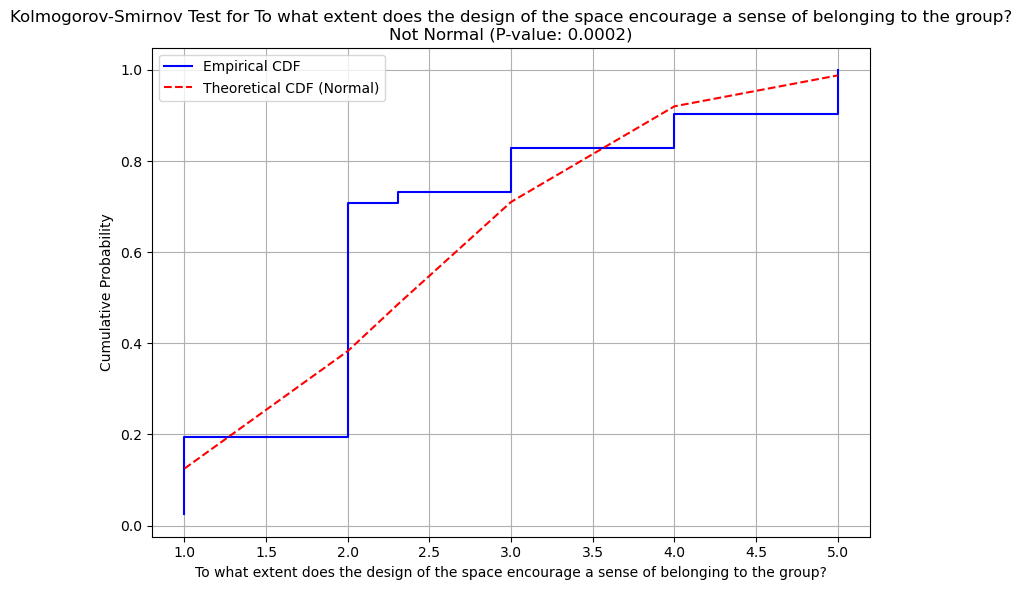

Kolmogorov-Smirnov Test Results for Experiment Group:
Column: How well the space allows you to concentrate?
  Statistic: 0.1973, P-value: 0.0770
  -> Fail to reject H₀: Data is likely normally distributed.
  -> P-value indicates no significant deviation from normality.



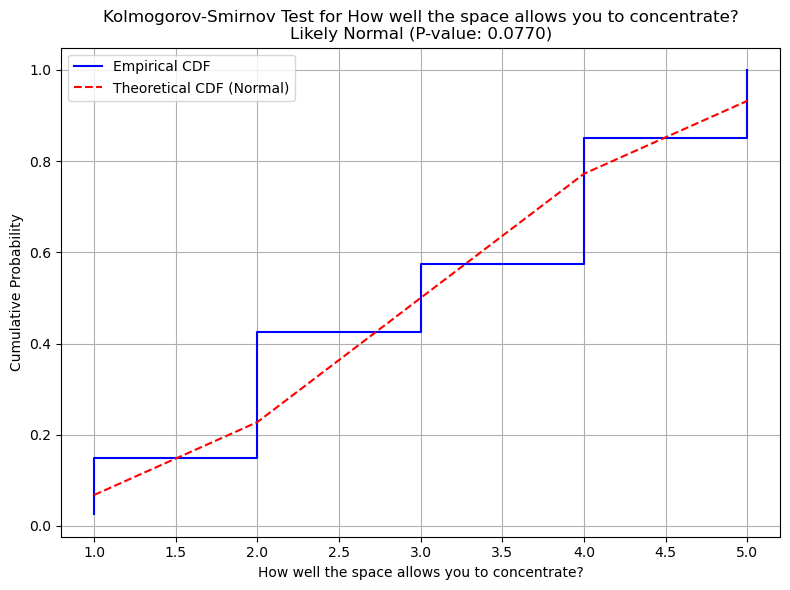

Column: To what extent would you feel safe expressing an opinion in this space?
  Statistic: 0.2294, P-value: 0.0247
  -> Reject H₀: Data is not normally distributed.
  -> P-value indicates significant deviation from normality.



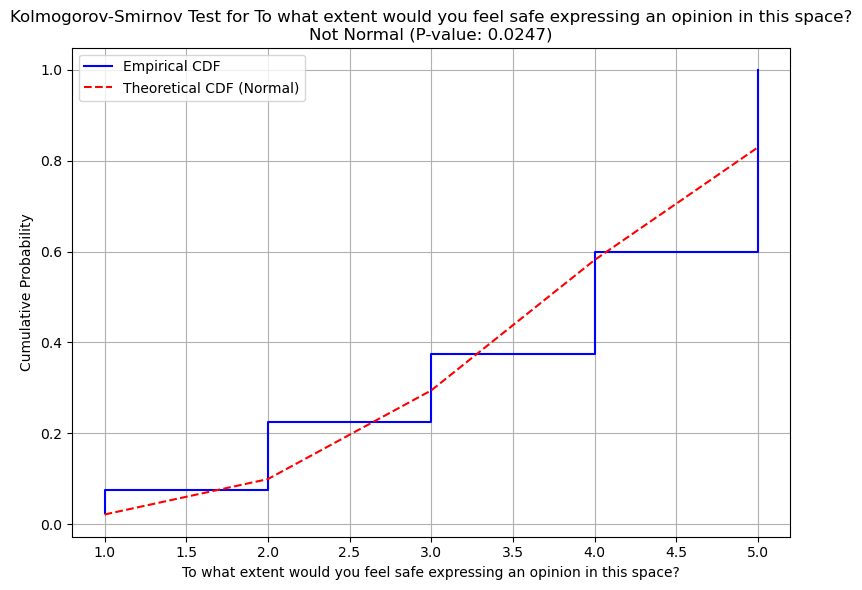

Column: How comfortable would you feel collaborating with others in this space?
  Statistic: 0.2628, P-value: 0.0063
  -> Reject H₀: Data is not normally distributed.
  -> P-value indicates significant deviation from normality.



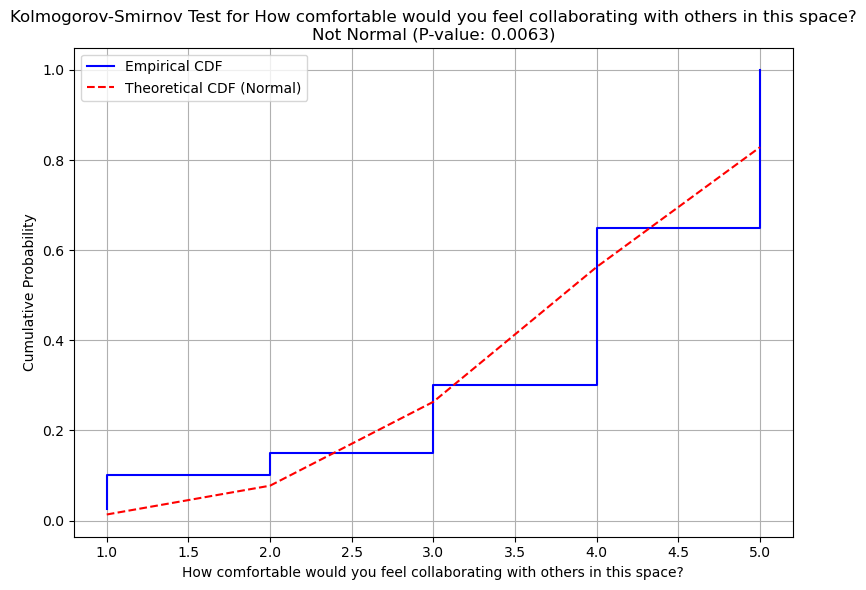

Column: To what extent does the space design provide a sense of privacy?
  Statistic: 0.1614, P-value: 0.2228
  -> Fail to reject H₀: Data is likely normally distributed.
  -> P-value indicates no significant deviation from normality.



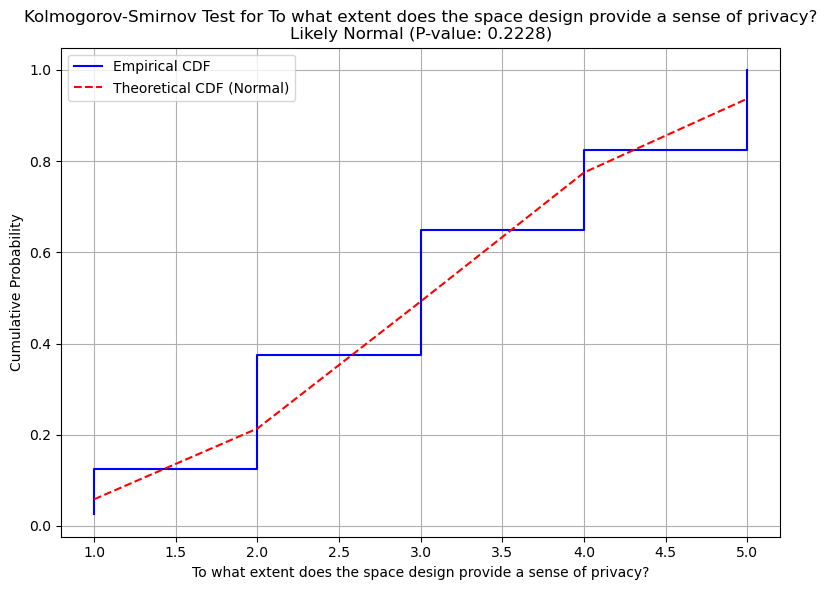

Column: Does the design of the space encourage creativity?
  Statistic: 0.2388, P-value: 0.0172
  -> Reject H₀: Data is not normally distributed.
  -> P-value indicates significant deviation from normality.



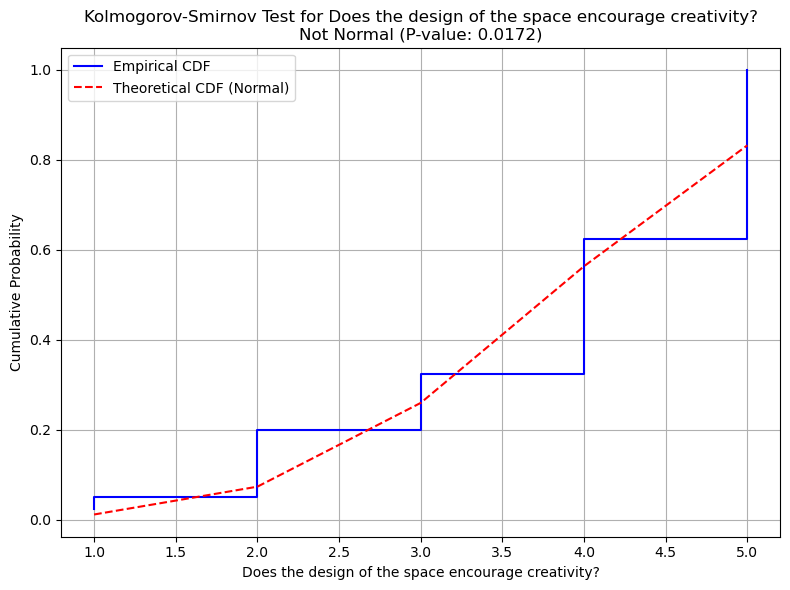

Column: How suitable is the space for team tasks?
  Statistic: 0.2483, P-value: 0.0117
  -> Reject H₀: Data is not normally distributed.
  -> P-value indicates significant deviation from normality.



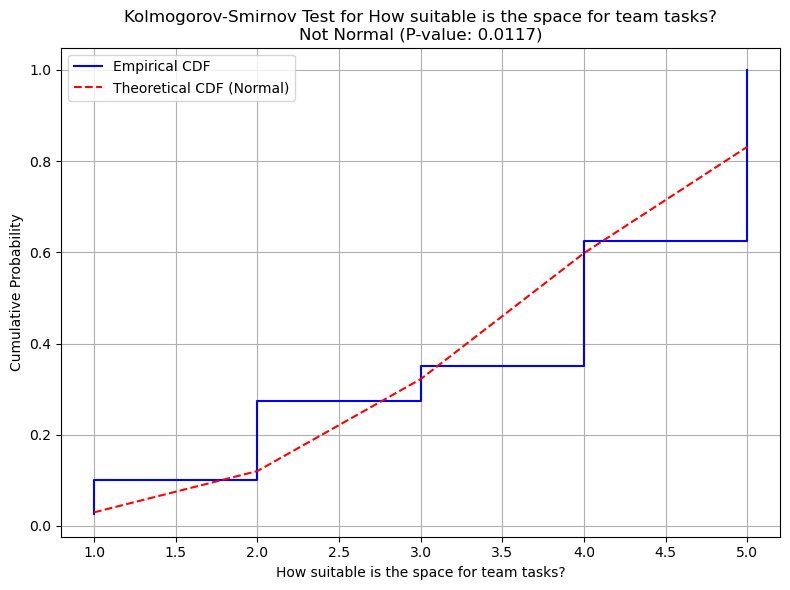

Column: To what extent does the design of the space encourage a sense of belonging to the group?
  Statistic: 0.2217, P-value: 0.0331
  -> Reject H₀: Data is not normally distributed.
  -> P-value indicates significant deviation from normality.



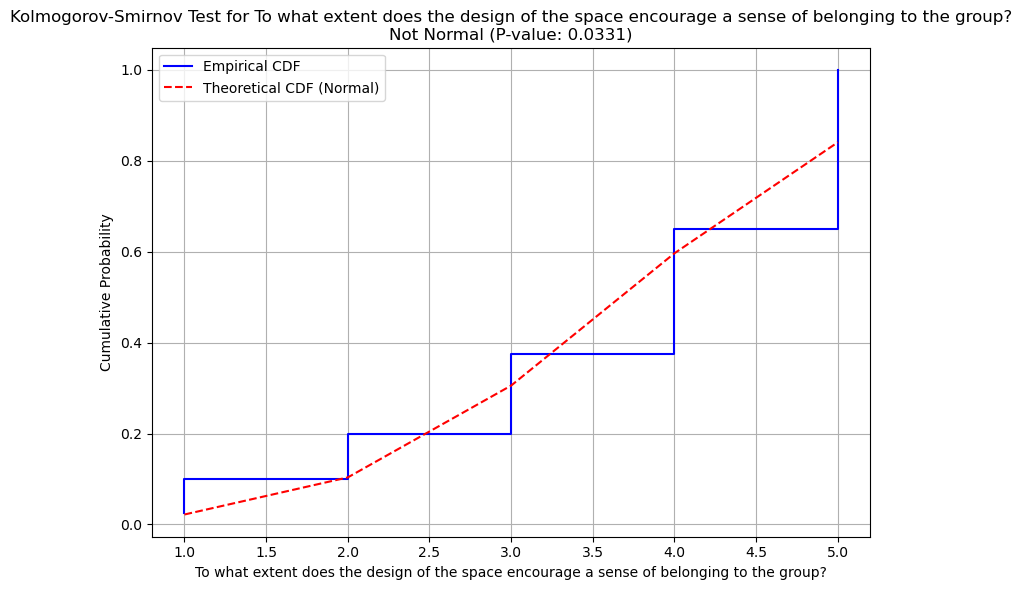

In [55]:
import pandas as pd
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt
import numpy as np

# Function to perform Kolmogorov-Smirnov test and plot ECDFs (Empirical Cumulative Distribution Functions)
def ks_test_with_ecdf(df, df_name):
    print(f"Kolmogorov-Smirnov Test Results for {df_name}:")
    for column in df.columns:
        if column.strip() not in ['ID', 'Would you prefer to use this space for meetings?'] and pd.api.types.is_numeric_dtype(df[column]):
            # Perform KS test assuming a normal distribution
            data = df[column].dropna()  # Drop missing values
            stat, p_value = kstest(data, 'norm', args=(data.mean(), data.std()))

            print(f"Column: {column}")
            print(f"  Statistic: {stat:.4f}, P-value: {p_value:.4f}")
            if p_value > 0.05:
                print("  -> Fail to reject H₀: Data is likely normally distributed.")
                print("  -> P-value indicates no significant deviation from normality.\n")
            else:
                print("  -> Reject H₀: Data is not normally distributed.")
                print("  -> P-value indicates significant deviation from normality.\n")

            # Plot ECDF and theoretical CDF
            sorted_data = np.sort(data)
            ecdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
            theoretical_cdf = norm.cdf(sorted_data, loc=data.mean(), scale=data.std())

            plt.figure(figsize=(8, 6))
            plt.step(sorted_data, ecdf, label="Empirical CDF", where='post', color='blue')
            plt.plot(sorted_data, theoretical_cdf, label="Theoretical CDF (Normal)", color='red', linestyle='--')
            plt.title(f"Kolmogorov-Smirnov Test for {column}\n"
                      f"{'Likely Normal' if p_value > 0.05 else 'Not Normal'} (P-value: {p_value:.4f})")
            plt.xlabel(column)
            plt.ylabel('Cumulative Probability')
            plt.legend()
            plt.grid()
            plt.tight_layout()
            plt.show()

# Perform KS test with ECDF plots on both DataFrames
ks_test_with_ecdf(control_group_df, "Control Group")
ks_test_with_ecdf(experiment_group_df, "Experiment Group")

In [54]:
from scipy.stats import mannwhitneyu

# Function to perform Mann-Whitney U test for each column
def mann_whitney_test_with_means(df1, df2, df1_name="Dataset 1", df2_name="Dataset 2"):
    print(f"Mann-Whitney U Test Results ({df1_name} vs {df2_name}):\n")
    # Select numeric columns common to both datasets
    common_columns = df1.select_dtypes(include='number').columns.intersection(df2.select_dtypes(include='number').columns)

    for column in common_columns:
        # Calculate means for the column in both datasets
        mean_df1 = df1[column].mean()
        mean_df2 = df2[column].mean()

        # Perform Mann-Whitney U test
        stat, p_value = mannwhitneyu(df1[column].dropna(), df2[column].dropna(), alternative='two-sided')

        # Determine which group has the higher mean
        higher_mean_group = df1_name if mean_df1 > mean_df2 else df2_name

        # Display results
        print(f"Column: {column}")
        print(f"  {df1_name} Mean: {mean_df1:.4f}")
        print(f"  {df2_name} Mean: {mean_df2:.4f}")
        print(f"  Higher Mean: {higher_mean_group}")
        print(f"  U Statistic: {stat:.4f}, P-value: {p_value:.4f}")
        if p_value > 0.05:
            print("  -> Fail to reject H₀: No significant difference between the groups.\n")
        else:
            print("  -> Reject H₀: Significant difference between the groups.\n")
# Perform Mann-Whitney U test on all numeric columns in the datasets
mann_whitney_test_with_means(control_group_df, experiment_group_df, 
                             df1_name="Control Group", df2_name="Experiment Group")

Mann-Whitney U Test Results (Control Group vs Experiment Group):

Column: How well the space allows you to concentrate?
  Control Group Mean: 2.9709
  Experiment Group Mean: 3.0000
  Higher Mean: Experiment Group
  U Statistic: 808.5000, P-value: 0.9154
  -> Fail to reject H₀: No significant difference between the groups.

Column: To what extent would you feel safe expressing an opinion in this space?
  Control Group Mean: 2.5600
  Experiment Group Mean: 3.7250
  Higher Mean: Experiment Group
  U Statistic: 406.5000, P-value: 0.0001
  -> Reject H₀: Significant difference between the groups.

Column: How comfortable would you feel collaborating with others in this space?
  Control Group Mean: 2.7467
  Experiment Group Mean: 3.8000
  Higher Mean: Experiment Group
  U Statistic: 422.0000, P-value: 0.0001
  -> Reject H₀: Significant difference between the groups.

Column: To what extent does the space design provide a sense of privacy?
  Control Group Mean: 2.1764
  Experiment Group Mean: 